"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  .. _LFW: http://vis-www.cs.umass.edu/lfw/

  original source: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html

"""

In [1]:
from time import time
import logging
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


##### Download the data, if not already on disk and load it as numpy arrays

In [3]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

In [4]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

2020-11-10 21:27:36,595 Loading LFW people faces from C:\Users\Satya\scikit_learn_data\lfw_home
2020-11-10 21:27:37,171 Loading face #00001 / 01288
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\e

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is dep

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is dep

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is dep

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is dep

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  face = imresize(face, resize)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\datasets\lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1

#### introspect the images arrays to find the shapes (for plotting)

In [5]:
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

#### for machine learning we use the data directly (as relative pixel position info is ignored by this model)

In [6]:
X = lfw_people.data
n_features = X.shape[1]

#### the label to predict is the id of the person

In [7]:
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [8]:
print "Total dataset size:"
print "n_samples: %d" % n_samples
print "n_features: %d" % n_features
print "n_classes: %d" % n_classes

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


#### Split into a training and testing set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled dataset): unsupervised feature extraction / dimensionality reduction

In [10]:
n_components = 150

print "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print "done in %0.3fs" % (time() - t0)

eigenfaces = pca.components_.reshape((n_components, h, w))

print "Projecting the input data on the eigenfaces orthonormal basis"
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print "done in %0.3fs" % (time() - t0)

Extracting the top 150 eigenfaces from 966 faces


C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


done in 0.217s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.031s


In [24]:
pca2 = RandomizedPCA(n_components=500, whiten=True).fit(X_train)
eigenfaces2 = pca2.components_.reshape((500, h, w))

X_train_pca2 = pca.transform(X_train)
X_test_pca2 = pca.transform(X_test)

C:\Users\Satya\.conda\envs\udacityIntro2ML\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


### `How much of the variance is explained by the first principal component? The second?`

In [20]:
pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1]

(0.19346527332004793, 0.15116845543998045)

#### Train a SVM classification model

In [11]:
print "Fitting the classifier to the training set"
t0 = time()
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_

Fitting the classifier to the training set
done in 15.201s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [25]:
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf2 = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf2 = clf2.fit(X_train_pca2, y_train)
clf2.best_estimator_

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

####  `As you add more principal components as features for training your classifier, do you expect it to get better or worse` 

#### `performance?`


`Could Go Either Way. More Features might add more complexity and cause the model to overfit`

#### Quantitative evaluation of the model quality on the test set

In [12]:
print "Predicting the people names on the testing set"
t0 = time()
y_pred = clf.predict(X_test_pca)
print "done in %0.3fs" % (time() - t0)

print classification_report(y_test, y_pred, target_names=target_names)
print confusion_matrix(y_test, y_pred, labels=range(n_classes))

Predicting the people names on the testing set
done in 0.052s
                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.38      0.48        13
     Colin Powell       0.83      0.87      0.85        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.82      0.98      0.89       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.94      0.81      0.87        36

      avg / total       0.85      0.84      0.84       322

[[  5   1   0   7   0   0   0]
 [  1  52   0   7   0   0   0]
 [  1   2  17   6   0   0   1]
 [  0   3   0 143   0   0   0]
 [  0   1   0   4  19   0   1]
 [  0   3   0   4   1   7   0]
 [  1   1   1   4   0   0  29]]


#### `Do you see any evidence of overfitting when using a large number of PCs?`
`yes Performance Starts to drop with many components`

In [26]:
y_pred2 = clf2.predict(X_test_pca2)

print classification_report(y_test, y_pred2, target_names=target_names)
print confusion_matrix(y_test, y_pred2, labels=range(n_classes))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.38      0.48        13
     Colin Powell       0.83      0.87      0.85        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.82      0.98      0.89       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.94      0.81      0.87        36

      avg / total       0.85      0.84      0.84       322

[[  5   1   0   7   0   0   0]
 [  1  52   0   7   0   0   0]
 [  1   2  17   6   0   0   1]
 [  0   3   0 143   0   0   0]
 [  0   1   0   4  19   0   1]
 [  0   3   0   4   1   7   0]
 [  1   1   1   4   0   0  29]]


#### `If you see a higher F1 score, does it mean the classifier is doing better, or worse?`

`Better`

#### Qualitative evaluation of the predictions using matplotlib

In [13]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


#### plot the result of the prediction on a portion of the test set

2020-11-10 21:29:06,107 findfont: Found a missing font file.  Rebuilding cache.
2020-11-10 21:29:06,111 font search path ['C:\\Users\\Satya\\.conda\\envs\\udacityIntro2ML\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf', 'C:\\Users\\Satya\\.conda\\envs\\udacityIntro2ML\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\afm', 'C:\\Users\\Satya\\.conda\\envs\\udacityIntro2ML\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\pdfcorefonts']
2020-11-10 21:29:06,766 generated new fontManager


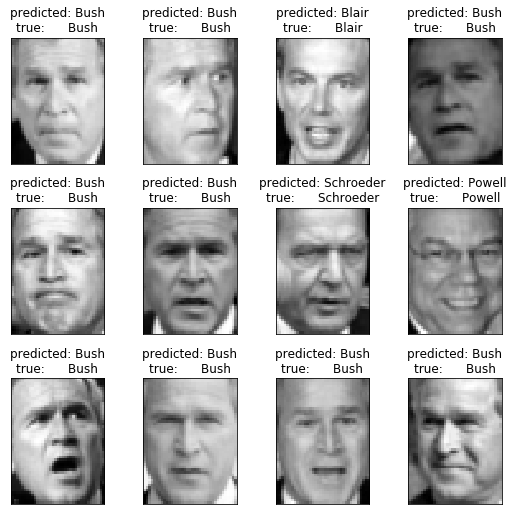

In [14]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)


#### plot the gallery of the most significative eigenfaces

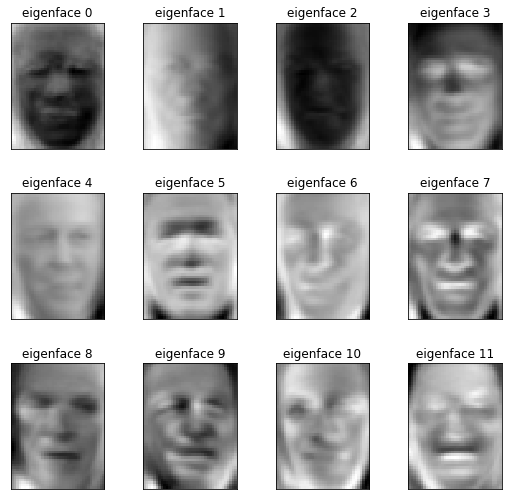

In [15]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

pl.show()